In [1]:
import numpy as np
import random
import math as mt
import matplotlib.pyplot as plt
from matplotlib import cm

In [6]:
def Z(f1p,f2p,x,y):
    "calcule la somme des signes des fip"
    return 0.5*(sign_array(f1p(x,y))+sign_array(f2p(x,y)))

def affZ(a,b,c,d,n,f1p,f2p,onlyPlotZ=True):
    "calcule les 0 de la fonction somme signe gradient de fi sur une fenetre [a,b]x[c,d]"
    size=0.1
    mark="o"
    fig, ax = plt.subplots()
    #we store points in list to optimize the code :
    matrix=[ [[0,0]] for k in range(9)]
    #we calculate multiple points and decide wich colot they are :                
    for k in range(n):
        x,y=random.uniform(a,b),random.uniform(c,d)
        sum_sig = Z(f1p,f2p,x,y)
        if mt.isclose(sum_sig[0],0) and mt.isclose(sum_sig[1],0):#0,0
        #if sum_sig[0]<=0:
            matrix[0].append([x,y])
        elif sum_sig[0]>0 and sum_sig[1]>0: #1,1
            matrix[1].append([x,y])
        elif sum_sig[0]>0 and sum_sig[1]<0:#1,-1
            matrix[2].append([x,y])
        elif sum_sig[0]<0 and sum_sig[1]>0:#-1,1
            matrix[3].append([x,y])
        elif sum_sig[0]<0 and sum_sig[1]<0:#-1,-1
            matrix[4].append([x,y])
        elif mt.isclose(sum_sig[0],0) and sum_sig[1]>0:#0,1
            matrix[5].append([x,y])
        elif mt.isclose(sum_sig[0],0) and sum_sig[1]<0:#0,-1
            matrix[6].append([x,y])
        elif sum_sig[0]>0 and mt.isclose(sum_sig[1],0):#1,0
            matrix[7].append([x,y])
        else: #-1,0
            matrix[8].append([x,y])
    
    #then we plot at the same time all points of the same color
    ax.scatter(np.array(matrix[0])[:,0],np.array(matrix[0])[:,1],s=size,marker=mark,color='red',label='(0,0)')
    if not(onlyPlotZ):
        ax.scatter(np.array(matrix[1])[:,0],np.array(matrix[1])[:,1],s=size,marker=mark,color='green',label='(1,1)')
        ax.scatter(np.array(matrix[2])[:,0],np.array(matrix[2])[:,1],s=size,marker=mark,color='blue',label='(1,-1)')
        ax.scatter(np.array(matrix[3])[:,0],np.array(matrix[3])[:,1],s=size,marker=mark,color='yellow',label='(-1,1)')
        ax.scatter(np.array(matrix[4])[:,0],np.array(matrix[4])[:,1],s=size,marker=mark,color='cyan',label='(-1,-1)')
        ax.scatter(np.array(matrix[5])[:,0],np.array(matrix[5])[:,1],s=size,marker=mark,color='pink',label='(0,1)')
        ax.scatter(np.array(matrix[6])[:,0],np.array(matrix[6])[:,1],s=size,marker=mark,color='purple',label='(0,-1)')
        ax.scatter(np.array(matrix[7])[:,0],np.array(matrix[7])[:,1],s=size,marker=mark,color='orange',label='(1,0)')
        ax.scatter(np.array(matrix[8])[:,0],np.array(matrix[8])[:,1],s=size,marker=mark,color='brown',label='(-1,0)')

    
    ax.set(xlim=(a,b),ylim=(c,d))
    ax.set_title('Différentes valeurs de la somme des signes des gradients des fi')
    ax.set_ylabel('coordonnée y')
    ax.set_xlabel('coordonnée x')
    ax.legend(loc='upper left',markerscale=30)
    plt.show()


def grad_quadra1(x,y):
    return np.array([2*(x-2),2*(y-1)])

def grad_quadra2(x,y):
    return np.array([2*(x-1),2*(y-2)])

def grad_quadra_liee1(x,y):
    return np.array([2*(x-y),2*(y-x)])

def grad_quadra_liee2(x,y):
    return np.array([2*(x-1-y),2*(y+1-x)])

def grad_quadra_liee3(x,y):
    o=0.74*mt.pi
    coefx=mt.cos(o)-mt.sin(o)
    coefy=mt.cos(o)+mt.sin(o)
    return np.array([2*coefx*(coefx*x-coefy*y),-2*coefy*(coefx*x-coefy*y)])

def grad_quadra_liee4(x,y):
    o=0.26*mt.pi
    coefx=mt.cos(o)-mt.sin(o)
    coefy=mt.cos(o)+mt.sin(o)
    return np.array([2*coefx*(coefx*x-coefy*y),-2*coefy*(coefx*x-coefy*y)])

def grad_quadra_cross(x,y):
    return np.array([2*x*y**2,2*y*x**2])

def grad_norm_disk(x,y):
    r=2
    if (x**2+y**2)**0.5<r:
        return np.array([0,0])
    else :
        return np.array([x,y])

def grad_norm_disk2(x,y):
    r=2
    if ((x-1)**2+(y-1)**2)**0.5<r:
        return np.array([0,0])
    else :
        return np.array([x,y])

def grad_norm_couloir(x,y):
    if y>x+1:
        return np.array([1,-1])
    if y<x-1:
        return np.array([-1,1])
    return np.array([0,0])

def sign1d(x):
    if abs(x)<0.0001:
        return 0
    elif x>0:
        return 1
    else :
        return -1

def sign_array(x):
    return np.array([sign1d(e) for e in x])

amp=5
pointx,pointy=0,0
#affZ(pointx-amp,pointx+amp,pointy-amp,pointy+amp,1000000,grad_quadra_liee1,grad_quadra1,onlyPlotZ=True)
#affZ(pointx-amp,pointx+amp,pointy-amp,pointy+amp,1000000,test,test2,onlyPlotZ=False)

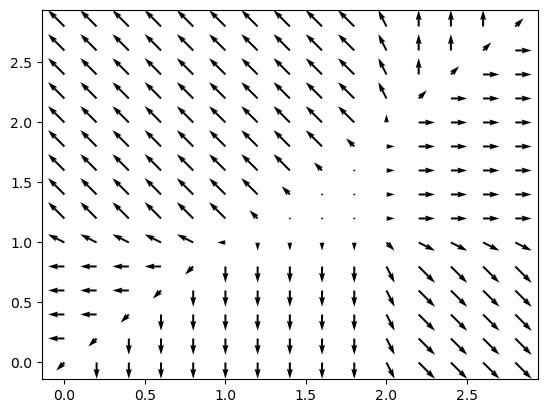

In [7]:
X = np.arange(0, 3, 0.2)
Y = np.arange(0, 3, 0.2)
U, V = np.meshgrid(X, Y)
U=[[ Z(grad_quadra_liee1,grad_quadra1,X[i],Y[j])[0] for i in range(15)]for j in range(15)]
V=[[ Z(grad_quadra_liee1,grad_quadra1,X[i],Y[j])[1] for i in range(15)]for j in range(15)]

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
# ax.quiverkey(q, X=0.3, Y=1.1, U=10,label='Quiver key, length = 10', labelpos='E')
plt.show()

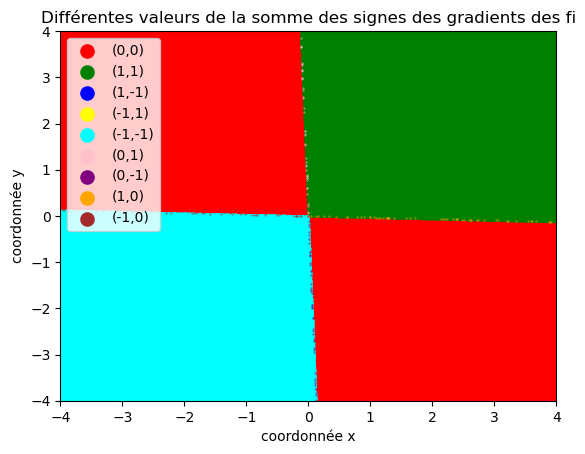

In [8]:
affZ(-4,4,-4,4,1000000,grad_quadra_liee3,grad_quadra_liee4,onlyPlotZ=False)

Le code pour plot $\sum_{i=1}^2 sign(\nabla f_i)$ est maintenant optimisé et on peut plot $10^6$ points en un temps raisonnable

$$ Soit \ d \in \mathbb{N} \ soit \ f: \mathbb{R}^d \rightarrow \mathbb{R} \ une \ fonction \ non  \ constante, \ soit \ \mathcal{Z}=\{x \in \mathbb{R}^d / \ \nabla{f}(x)=0 \}, \ si \ \exists \ (x_1,...,x_d) \in {\mathbb{R}^d}^d une \ famille \ libre / \ \bigcup_{i=1}^d Vect(x_i) \subset \mathcal{Z} \ alors \ f \ n'est \ pas \ convexe$$

Ceci est un corolaire de $ Soit \ f \ convexe \ alors \ \mathcal{Z} \ est \ convexe $ .

Observons maintenant la forme des la fonction $sign(\nabla f)$ pour différentes valeurs de f convexe et voyons si une forme générale se distingue.

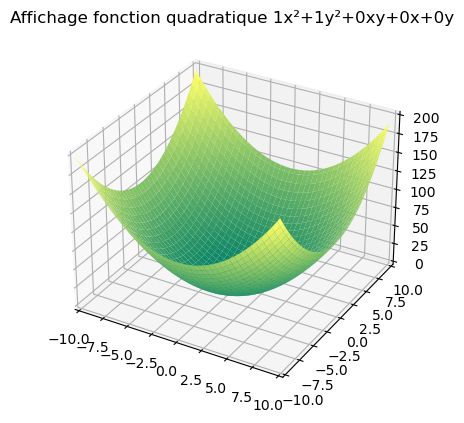

In [9]:
#définissons une fonction qui permet d'afficher n'importe quelle fonction quadratique
def plot_quadra(a,b,c,d,e,wide,step):
    wide=10
    step=0.25
    n=int(2*wide//step)
    X = np.arange(-wide, wide, step)
    Y = np.arange(-wide, wide, step)
    R=[[a*X[i]**2+b*Y[j]**2+c*X[i]*Y[j]+d*X[i]+e*Y[j] for i in range(n)]for j in range(n)]
    X, Y = np.meshgrid(X, Y)
    Z = np.array(R)
    # Plot the surface
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.summer)
    ax.set(xlim=(-wide,wide),ylim=(-wide,wide))
    ax.set_title('Affichage fonction quadratique '+str(a)+'x²+'+str(b)+'y²+'+str(c)+'xy+'+str(d)+'x+'+str(e)+'y')
    plt.show()
plot_quadra(1,1,0,0,0,5,0.10)
    

In [ ]:
def plot(x,y,indx,ax):
    size=1
    if indx == 1:
        ax.scatter(x ,y , marker='o', s=size, color='r')
    elif indx ==2:
        ax.scatter(x ,y , marker='o', s=size, color='b')
    elif indx == 3:
        ax.scatter(x ,y , marker='o', s=size, color='g')
    elif indx == 4:
        ax.scatter(x ,y , marker='o', s=size, color='m')
    elif indx == 5:
        ax.scatter(x ,y , marker='o', s=size, color='y')
    else:    
        ax.scatter(x ,y , marker='o', s=size, color='c')
        
def quadra_exp_line(x,y):
    return np.array([2*(mt.exp(x)+mt.exp(-x))*(mt.exp(x)-mt.exp(-x)+mt.exp(y)-mt.exp(-y)),2*(mt.exp(y)+mt.exp(-y))*(mt.exp(x)-mt.exp(-x)+mt.exp(y)-mt.exp(-y))])

def aff_sign_values(gradf,n):
    a,b,c,d=-10,10,-10,10
    fig, ax = plt.subplots()
    points = [] # contains tuples of the coordinate of a point and the value of the sign of gradient 
    # with convention 1=(1,1),2=(-1,1),3=(-1,-1),4=(-1,1),5=(0,0) the rest is equal to 6
    total_points = 0
    dict={(1,1):1,(-1,1):2,(-1,-1):3,(1,-1):4,(0,0):5,(1,0):6,(0,1):6,(-1,0):6,(0,-1):6}
    #color_dict={1:'r',2:'g',3:'b',4:'m',5:'c',6:'y'}
    #color_dict={(1,1):'red',(-1,1):'green',(-1,-1):'blue',(1,-1):'magenta',(0,0):'cyan',(1,0):'yellow',(0,1):'yellow',(-1,0):'yellow',(0,-1):'yellow'}
    for _ in range(n):
        x, y = random.uniform(a, b), random.uniform(c, d)
        sign_gradf=sign_array(gradf(x, y))
        tuplexy=(sign_gradf[0],sign_gradf[1])
        indx=dict[tuplexy]
        points.append((x,y,indx))
        #points.append(((x,y),map(sign_gradf[0],sign_gradf[1])))
        total_points += 1
        
    #plotting
    ax.set(xlim=(a,b),ylim=(c,d))
    for e in points:
        plot(*e,ax)
    ax.set_aspect('equal')
    ax.grid(True)

    
    plt.show()



def aff_sign_values2(gradf,n,centerx,centery,amp):
    "Calcule les differentes valeurs prises par le signe du gradient de f en fonction de x"
    size=0.1
    mark="o"
    fig, ax = plt.subplots()
    a,b,c,d=centerx-amp,centerx+amp,centery-amp,centery+amp
    matrix=[ [[0,0]] for k in range(9)]
    #we calculate multiple points and decide wich colot they are :                
    for k in range(n):
        x,y=random.uniform(a,b),random.uniform(c,d)
        sign_gradf=sign_array(gradf(x, y))
        if mt.isclose(sign_gradf[0],0) and mt.isclose(sign_gradf[1],0):#0,0
            matrix[0].append([x,y])
        elif sign_gradf[0]>0 and sign_gradf[1]>0: #1,1
            matrix[1].append([x,y])
        elif sign_gradf[0]>0 and sign_gradf[1]<0:#1,-1
            matrix[2].append([x,y])
        elif sign_gradf[0]<0 and sign_gradf[1]>0:#-1,1
            matrix[3].append([x,y])
        elif sign_gradf[0]<0 and sign_gradf[1]<0:#-1,-1
            matrix[4].append([x,y])
        elif mt.isclose(sign_gradf[0],0) and sign_gradf[1]>0:#0,1
            matrix[5].append([x,y])
        elif mt.isclose(sign_gradf[0],0) and sign_gradf[1]<0:#0,-1
            matrix[6].append([x,y])
        elif sign_gradf[0]>0 and mt.isclose(sign_gradf[1],0):#1,0
            matrix[7].append([x,y])
        else: #-1,0
            matrix[8].append([x,y])
    
    #then we plot at the same time all points of the same color
    ax.scatter(np.array(matrix[0])[:,0],np.array(matrix[0])[:,1],s=size,marker=mark,color='red',label='(0,0)')
    ax.scatter(np.array(matrix[1])[:,0],np.array(matrix[1])[:,1],s=size,marker=mark,color='green',label='(1,1)')
    ax.scatter(np.array(matrix[2])[:,0],np.array(matrix[2])[:,1],s=size,marker=mark,color='blue',label='(1,-1)')
    ax.scatter(np.array(matrix[3])[:,0],np.array(matrix[3])[:,1],s=size,marker=mark,color='yellow',label='(-1,1)')
    ax.scatter(np.array(matrix[4])[:,0],np.array(matrix[4])[:,1],s=size,marker=mark,color='cyan',label='(-1,-1)')
    ax.scatter(np.array(matrix[5])[:,0],np.array(matrix[5])[:,1],s=size,marker=mark,color='pink',label='(0,1)')
    ax.scatter(np.array(matrix[6])[:,0],np.array(matrix[6])[:,1],s=size,marker=mark,color='purple',label='(0,-1)')
    ax.scatter(np.array(matrix[7])[:,0],np.array(matrix[7])[:,1],s=size,marker=mark,color='orange',label='(1,0)')
    ax.scatter(np.array(matrix[8])[:,0],np.array(matrix[8])[:,1],s=size,marker=mark,color='brown',label='(-1,0)')

    ax.set(xlim=(a,b),ylim=(c,d))
    ax.set_title('Différentes valeurs du signe du gradient de f')
    ax.set_ylabel('coordonnée y')
    ax.set_xlabel('coordonnée x')
    ax.legend(loc='upper left',markerscale=30)
    plt.show()

"""
n=10000
aff_sign_values(grad_quadra2,n)
"""
def test(x,y):
    return np.array([14*x+5*y+1,5*x+7+2*y])
def test2(x,y):
    return np.array([6*x+5*y+2,5*x+22*y+17])

def contre_ex_cvx(x,y):
    return np.array([mt.exp(x+3*y-0.1)+mt.exp(x-3*y-0.1)-mt.exp(-x-0.1),
                     3*mt.exp(x+3*y-0.1)-3*mt.exp(x-3*y-0.1)])
n=100000
aff_sign_values2(test,n,-0.5,0,1)

In [ ]:
aff_sign_values2(contre_ex_cvx,n,0,0,3)

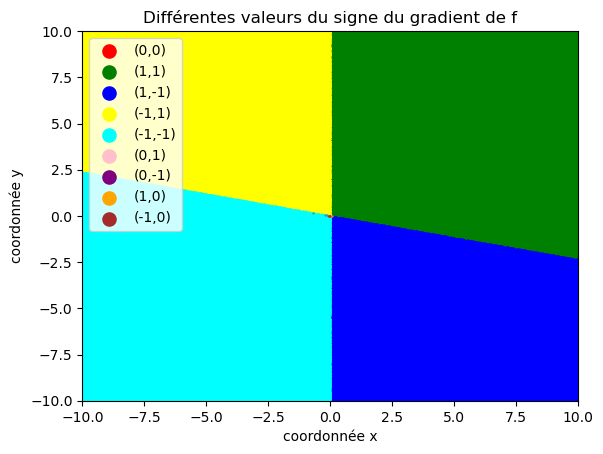

In [11]:
n=1000000
def power4grad(x,y):
    return np.array([4 * x**3 + 4 * x * y**2 + 3 * x**2 * y,4 * y**3 + 4 * x**2 * y + x**3])
aff_sign_values2(power4grad,n,0,0,10)

Voyons maitenant si le noyau est encore une droite pour des fonctions plus compliquées.

In [ ]:
aff_sign_values2(grad_norm_couloir,1000000,0,0,10)

In [ ]:
aff_sign_values2(grad_norm_disk,1000000,0,0,10)

Maintenant on se pose la question est ce que les frontières sont toujours des lignes?
On va voir que ce peut être un couloir infini.

In [ ]:
def octogone(x,y):
    c=(abs(x)+abs(y)+2)/2
    list=[max(abs(x)-1,0),max(abs(y)-1,0),c]
    return max(list)
    
wide=10
step=0.25
n=int(2*wide//step)
print(n)
from matplotlib import cm
X = np.arange(-wide, wide, step)
Y = np.arange(-wide, wide, step)
R=[[octogone(X[i],Y[j]) for i in range(n)]for j in range(n)]
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)




print(X)
print(Y)

Z = np.array(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.summer)
"""n voit bien que il y a des fonctions où les zones frontières ne sont pas des droites, donc on va restreindre les cas et se concentrer sur les fonctions quadratiques, on avait vu que la zone d'annulation du gradient est un point et au maximum, au sens de l'i
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
"""
ax.set(xlim=(-wide,wide),ylim=(-wide,wide))


plt.show()

On voit bien que il y a des fonctions où les zones frontières ne sont pas des droites, donc on va restreindre les cas et se concentrer sur les fonctions quadratiques, on avait vu que la zone d'annulation du gradient est un point et au maximum, au sens de l'inclusion, une droite.
Lorsque l'on a deux fonctions qui ont une droite pour les points critiques on pouvait avoir un sablier pour Z. 
Voyons la forme de $ sign(\nabla f_i) $ pour différentes fonctions quadratiques.

In [ ]:
o=+mt.pi*1.75
coefx=mt.cos(o)-mt.sin(o)
coefy=mt.cos(o)+mt.sin(o)
aff_sign_values2(lambda x,y : np.array([2*coefx*(coefx*x-coefy*y),-2*coefy*(coefx*x-coefy*y)]),100000,0,0,10)
plot_quadra(coefx**2,coefy**2,-2*coefx*coefy,0,0,5,0.1)

On a deux zones une pour (1,1) et une pour (-1,-1). On voit bien la séparation d'angle $ \frac{\pi}{4}$. On a l'impression que pour une fonction quadratique, si le gradient s'annule en un point on a quatres zones et si le gradient s'annule sur une droite on a deux zones.
Maintenant faisons tourner cette frontière. D'abord pour $ \theta < \frac{\pi}{2}$

In [ ]:
def grad_quadra_droite_angleintermed(x,y):
    o=mt.pi*0.4
    coefx=mt.cos(o)-mt.sin(o)
    coefy=mt.cos(o)+mt.sin(o)
    return np.array([2*coefx*(coefx*x-coefy*y),-2*coefy*(coefx*x-coefy*y)])
aff_sign_values2(grad_quadra_droite_angleintermed,500000,0,0,10)

On a encore deux zones une pour (1,1) et une pour (-1,-1), voyons ce qu'il se passe si $ \theta $ dépasse le seuil $ \frac{\pi}{2}$

In [ ]:
def grad_quadra_droite_sup_pis2(x,y):
    o=mt.pi*0.4
    coefx=mt.cos(o)-mt.sin(o)
    coefy=mt.cos(o)+mt.sin(o)
    return np.array([2*coefx*(coefx*x-coefy*y),-2*coefy*(coefx*x-coefy*y)])
aff_sign_values2(grad_quadra_droite_sup_pis2,500000,0,0,10)

On voit que les couleurs ont changé, donc on a encore deux zones mais elles ne correspondent plus aux même valeur du vecteur de $sign(\nabla f_i) $.

De ce fait pour deux fonctions qui s'annulent sur une droite chacune, si les droites sont séparées pas un angle de plus de $\frac{\pi}{4}$ alors il n'y a qu'un seul point d'intersection et Z est un singleton. En effet la somme d'un élement de {(1,1),(-1,-1)} avec un élement de {(1,-1),(-1,1)} ne peut pas valoir $ \overrightarrow{0}$

Intéressons nous aux fonctions $ a x^2 + b y^2 + cxy + dx +ey +f $ qui s'annulent sur une droite et qui sont convexes.
\
La condition de convexité est 
$\begin{cases}
    & 4ab-c^2>0 \\
    & a+b>0\\
\end{cases} $
\
Le vecteur $ sign(\nabla{f})  =
\begin{pmatrix}
\dfrac{\partial s}{\partial x} \\
\dfrac{\partial s}{\partial y} \\
\end{pmatrix} = 
\begin{pmatrix}
2ax+cy+d \\
2by+cy+e \\
\end{pmatrix}
$
\
Regardons quand il s'annule, si l'on souhaite qu'il s'annule sur une droite donc il faut que ces deux coeficients soient liés donc on veut
\
$
\begin{equation}
2ax+cy+d = \lambda(2by+cy+e) = 0
\end{equation}
$
Enfin on a 
$\begin{cases}
    & d = \lambda e \\
    & 2a = \lambda c\\
    & c = 2\lambda b
\end{cases} $
Puisque le coeficient f s'en va dans le gradient oublions le alors l'ensemble des fonction quadratiques dont le gradient s'annule sur une droite est décrit par 3 paramètres a,d et $\lambda$ et s'écrivent $a x^2 + \frac{a}{\lambda^2} y^2 + \frac{2a}{\lambda}xy + dx +\frac{d}{\lambda}y $ et la condition de convexité devient uniquement a>0.

In [ ]:
#random parameters
rrange=4
a=random.uniform(0,2*rrange)
lam=random.uniform(-rrange,rrange)
d=random.uniform(-rrange,rrange)

wide=10
step=0.25
n=int(2*wide//step)
print(n)
from matplotlib import cm
X = np.arange(-wide, wide, step)
Y = np.arange(-wide, wide, step)
R=[[a*X[i]**2+a*(Y[j]/lam)**2+X[i]*Y[j]*2*a/lam+d*X[i]+d*Y[j]/lam for i in range(n)]for j in range(n)]
X, Y = np.meshgrid(X, Y)
Z = np.array(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)
ax.set(xlim=(-wide,wide),ylim=(-wide,wide))
plt.show()

On a toujours une fonction convexe qui est constante sur une droite.

Idée de fonction de lyapunov, en se basant sur les observations dans $\mathbb{R} \ et \ \mathbb{R}^2$, $ V(x)=\frac{1}{N} \sum_{i=1}^N \int_0^x sign(\nabla f_i(s) ) ds$ telle que $V(\mathcal{Z})=\{0\}$

https://www.youtube.com/watch?v=u7D0LR68z0c

In [ ]:
#On va voir ce qu'il se passe si on met beaucoup de fonctions
def Z_list(f_list,x,y):
    "calcule la somme des signes des fip divise par le nb de fonctions"
    sum=0
    for f in f_list:
        sum+=sign_array(np.array([2*f[0]*x+2*f[0]*y/f[1]+f[2],(2*f[0]*x+2*f[0]*y/f[1]+f[2])/f[1]]))
    return sum/len(f_list)

def affZ_list(a,b,c,d,n,grad_f_list):
    "calcule les 0 de la fonction somme signe gradient de fi sur une fenetre [a,b]x[c,d]"
    size=0.1
    mark="o"
    fig, ax = plt.subplots()
    #we store points in list to optimize the code :
    xvalues=[]
    yvalues=[]
    #we calculate multiple points and decide if they are in kernel:                
    for k in range(n):
        x,y=random.uniform(a,b),random.uniform(c,d)
        sum_sig = Z_list(grad_f_list,x,y)
        if mt.isclose(sum_sig[0],0) and mt.isclose(sum_sig[1],0):#0,0
            xvalues.append(x)
            yvalues.append(y)
    
    #then we plot at the same time all points of the same color
    ax.scatter(xvalues,yvalues,s=size,marker=mark,color='red',label='(0,0)')
    ax.set(xlim=(a,b),ylim=(c,d))
    ax.set_title('Différentes valeurs de la somme des signes des gradients des fi')
    ax.set_ylabel('coordonnée y')
    ax.set_xlabel('coordonnée x')
    ax.legend(loc='upper left',markerscale=30)
    plt.show()
    
n=100
maxvalue=4
A = np.random.uniform(0,2*maxvalue,2*n)
LAM = np.random.uniform(-maxvalue,maxvalue,2*n)
D = np.random.uniform(-maxvalue,maxvalue,2*n)

grad_f_list = [[A[k],LAM[k],D[k]] for k in range(2*n)]
#grad_f_list.append(lambda x,y : np.array([2*A[k]*x+2*A[k]*y/LAM[k]+D[k],(2*A[k]*x+2*A[k]*y/LAM[k]+D[k])/LAM[k]]))
affZ_list(pointx-amp,pointx+amp,pointy-amp,pointy+amp,10000,grad_f_list)

X = np.arange(-3, 3, 0.4)
Y = np.arange(-3, 3, 0.4)
U, V = np.meshgrid(X, Y)
U=[[ Z_list(grad_f_list,X[i],Y[j])[0] for i in range(15)]for j in range(15)]
V=[[ Z_list(grad_f_list,X[i],Y[j])[1] for i in range(15)]for j in range(15)]

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
# ax.quiverkey(q, X=0.3, Y=1.1, U=10,label='Quiver key, length = 10', labelpos='E')
plt.show()


On voit qu'au delà de deux fonctions l'ensemble Z est vide ou alors c'est un singleton ou une droite. Par contre ce qu est intéressant c'est le champ vectoriel de la fonction $ \sum_i sign( \nabla f_i ) $. On voit que tous les vecteurs semblent partir d'un point, Z ? 

In [22]:
#On va voir ce qu'il se passe si on met beaucoup de fonctions
def Z_list2(f_list,x,y):
    "calcule la somme des signes des fip divise par le nb de fonctions"
    sum=0
    for f in f_list:
        test=f[0].dot(np.array([x,y]))
        #print(f[0].shape,np.array([x,y]).shape,f[1].shape,test.shape)
        sum+=sign_array(f[0].dot(np.array([x,y]))+f[1])
    return sum/len(f_list)

def affZ_list2(a,b,c,d,n,grad_f_list,file_name="default"):
    "calcule les 0 de la fonction somme signe gradient de fi sur une fenetre [a,b]x[c,d]"
    size=0.1
    mark="o"
    fig, ax = plt.subplots()
    #we store points in list to optimize the code :
    xvalues=[]
    yvalues=[]
    xvalues0=[]
    yvalues0=[]
    xvalues1=[]
    yvalues1=[]
    #we calculate multiple points and decide if they are in kernel:                
    for k in range(n):
        x,y=random.uniform(a,b),random.uniform(c,d)
        sum_sig = Z_list2(grad_f_list,x,y)
        if mt.isclose(sum_sig[0],0) and mt.isclose(sum_sig[1],0):#0,0
            xvalues.append(x)
            yvalues.append(y)
        if mt.isclose(sum_sig[0],0) :#0,x
            xvalues0.append(x)
            yvalues0.append(y)
        if mt.isclose(sum_sig[1],0):#x,0
            xvalues1.append(x)
            yvalues1.append(y)
    

 #then we plot at the same time all points of the same color
    ax.scatter(xvalues0,yvalues0,s=size,marker=mark,color='blue',label='(0,0)')
    ax.set(xlim=(a,b),ylim=(c,d))
    ax.set_title('Différentes valeurs de la somme des signes des gradients des fi')
    ax.set_ylabel('coordonnée y')
    ax.set_xlabel('coordonnée x')
    ax.legend(loc='upper left',markerscale=30)
    

 #then we plot at the same time all points of the same color
    ax.scatter(xvalues1,yvalues1,s=size,marker=mark,color='green',label='(0,0)')
    ax.set(xlim=(a,b),ylim=(c,d))
    ax.set_title('Différentes valeurs de la somme des signes des gradients des fi')
    ax.set_ylabel('coordonnée y')
    ax.set_xlabel('coordonnée x')
    ax.legend(loc='upper left',markerscale=30)
    

#then we plot at the same time all points of the same color
    ax.scatter(xvalues,yvalues,s=size,marker=mark,color='red',label='(0,0)')
    ax.set(xlim=(a,b),ylim=(c,d))
    ax.set_title('Différentes valeurs de la somme des signes des gradients des fi')
    ax.set_ylabel('coordonnée y')
    ax.set_xlabel('coordonnée x')
    ax.legend(loc='upper left',markerscale=30)
    #plt.savefig('SumSigGradF_'+str(file_name)+'.png')
    plt.show()
    
n=1
maxvalue=5
A = np.random.uniform(0,2*maxvalue,2*n)
LAM = np.random.uniform(-maxvalue,maxvalue,2*n)
D = np.random.uniform(-maxvalue,maxvalue,2*n)

def SSDP(M):
    return M.T@M

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

pointx,pointy=0,0
amp=10
for k in range(0):
    grad_f_list = [[SSDP(np.random.randn(2,2)),np.random.randn(2)] for k in range(2*n)]
    affZ_list2(pointx-amp,pointx+amp,pointy-amp,pointy+amp,1000000,grad_f_list,k)

"""
X = np.arange(-3, 3, 0.4)
Y = np.arange(-3, 3, 0.4)
U, V = np.meshgrid(X, Y)
U=[[ Z_list(grad_f_list,X[i],Y[j])[0] for i in range(15)]for j in range(15)]
V=[[ Z_list(grad_f_list,X[i],Y[j])[1] for i in range(15)]for j in range(15)]

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
# ax.quiverkey(q, X=0.3, Y=1.1, U=10,label='Quiver key, length = 10', labelpos='E')
plt.show()
"""


"\nX = np.arange(-3, 3, 0.4)\nY = np.arange(-3, 3, 0.4)\nU, V = np.meshgrid(X, Y)\nU=[[ Z_list(grad_f_list,X[i],Y[j])[0] for i in range(15)]for j in range(15)]\nV=[[ Z_list(grad_f_list,X[i],Y[j])[1] for i in range(15)]for j in range(15)]\n\nfig, ax = plt.subplots()\nq = ax.quiver(X, Y, U, V)\n# ax.quiverkey(q, X=0.3, Y=1.1, U=10,label='Quiver key, length = 10', labelpos='E')\nplt.show()\n"

## Contre exemple


In [90]:
def descente(n_iter,x_init,gamma,gradf1,gradf2):
    x,y = x_init
    L=[(x,y)]
    for _ in range(n_iter):
        J= Z(gradf1, gradf2, x, y)
        x = x - gamma * J[0]
        y = y - gamma * J[1]
        L.append((x,y)) 
    return np.array(L)



def aff_stability(a,b,c,d,n,gradf1,gradf2,gamma,x_init,n_iter):
    "calcule les 0 de la fonction somme signe gradient de fi sur une fenetre [a,b]x[c,d]"
    size=0.1
    mark="o"
    fig, ax = plt.subplots()
    #we store points in list to optimize the code :
    xvalues=[]
    yvalues=[]
    xvalues0=[]
    yvalues0=[]
    xvalues1=[]
    yvalues1=[]
    #we calculate multiple points and decide if they are in kernel:                
    for k in range(n):
        x,y=random.uniform(a,b),random.uniform(c,d)
        sum_sig = Z(gradf1,gradf2,x,y)
        if mt.isclose(sum_sig[0],0) and mt.isclose(sum_sig[1],0):#0,0
            xvalues.append(x)
            yvalues.append(y)
        if mt.isclose(sum_sig[0],0) :#0,x
            xvalues0.append(x)
            yvalues0.append(y)
        if mt.isclose(sum_sig[1],0):#x,0
            xvalues1.append(x)
            yvalues1.append(y)
    #trajectory determination
    trajectory=descente(n_iter,x_init,gamma,gradf1,gradf2)
    

 #then we plot at the same time all points of the same color
    ax.scatter(xvalues0,yvalues0,s=size,marker=mark,color='blue',label='Z1')
    ax.set(xlim=(a,b),ylim=(c,d))
    
 #then we plot at the same time all points of the same color
    ax.scatter(xvalues1,yvalues1,s=size,marker=mark,color='green',label='Z2')
    ax.set(xlim=(a,b),ylim=(c,d))
    
#then we plot at the same time all points of the same color
    ax.scatter(xvalues,yvalues,s=size,marker=mark,color='red',label='Z=Z1∩Z2')
    ax.set(xlim=(a,b),ylim=(c,d))
    #ax.set_title('Différentes valeurs de la somme des sign(s des gradients des fi')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    


#then we plot the trajectory
    ax.scatter(trajectory[:,0],trajectory[:,1],s=2,marker="x",color='black',label='Sign gradient descend trajectory')
    ax.scatter(trajectory[0,0],trajectory[0,1],s=10,marker="x",color='yellow',label='Initialization')
    ax.legend(loc='upper left',markerscale=2)
    plt.savefig('CounterExample.png')
    plt.show()
    return trajectory

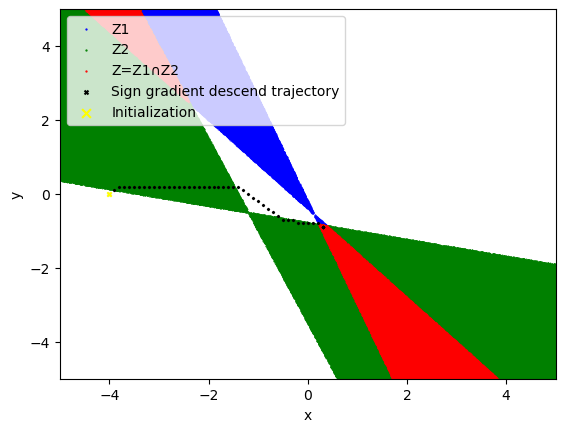

In [91]:
traj = aff_stability(-5,5,-5,5,1000000,test,test2,0.1,(-4,0),50)

In [92]:
def step_explanation(traj,gradf1,gradf2,f1,f2):
    print("Starts trajectory at ("+str(traj[0,0])+","+str(traj[0,1])+")")
    dico={True:"in",False:"out"}
    for n,e in enumerate(traj,start=0):
        objectif=round(f1(*e)+f2(*e),2)
        sumsigngrad=Z(gradf1,gradf2,*e)
        inZ1=(sumsigngrad[0]==0)
        inZ2=(sumsigngrad[1]==0)
        inZ=inZ1 and inZ2
        print("Step "+str(n)+" : (x,y) ="+str(e)+", objective = "+str(objectif)+", $\\sum_{i=1}^2 sign(\\nabla f_i )$  = "+str(sumsigngrad)+"\\\\ Z : "+ str(dico[inZ])+", Z1 : "+ str(dico[inZ1])+", Z2 : "+ str(dico[inZ2])+"\n")

def f1(x,y):
    return 7*x**2+y**2+5*x*y+x+7*y
def f2(x,y):
    return 3*x**2+11*y**2+5*x*y+2*x+17*y

In [93]:
step_explanation(traj,test,test2,f1,f2)
    

Starts trajectory at (-4.0,-4.0)
Step 0 : (x,y) =[-4.  0.], objective = 148.0, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1. -1.]\\ Z : out, Z1 : out, Z2 : out

Step 1 : (x,y) =[-3.9  0.1], objective = 139.02, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1. -1.]\\ Z : out, Z1 : out, Z2 : out

Step 2 : (x,y) =[-3.8  0.2], objective = 130.68, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1.  0.]\\ Z : out, Z1 : out, Z2 : in

Step 3 : (x,y) =[-3.7  0.2], objective = 123.68, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1.  0.]\\ Z : out, Z1 : out, Z2 : in

Step 4 : (x,y) =[-3.6  0.2], objective = 116.88, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1.  0.]\\ Z : out, Z1 : out, Z2 : in

Step 5 : (x,y) =[-3.5  0.2], objective = 110.28, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1.  0.]\\ Z : out, Z1 : out, Z2 : in

Step 6 : (x,y) =[-3.4  0.2], objective = 103.88, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1.  0.]\\ Z : out, Z1 : out, Z2 : in

Step 7 : (x,y) =[-3.3  0.2], objective = 97.68, $\sum_{i=1}^2 sign(\nabla f_i )$  = [-1.  0.]